In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler 
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB 
from sklearn.metrics import classification_report
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC

%matplotlib inline
df = pd.read_csv('cervical.csv')
df.head()

,Age,Numberofsexualpartners,Firstsexualintercourse,Numofpregnancies,Smokes,Smokesyears,Smokespacksyear,HormonalContraceptives,HormonalContraceptivesyears,IUD,...,STDsHPV,STDsNumberofdiagnosis,DxCancer,DxCIN,DxHPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4,15,1,0,0.0,0.0,0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
1,15,1,14,1,0,0.0,0.0,0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
2,52,5,16,4,1,37.0,37.0,1,3.0,0,...,0,0,1,0,1,0,0,0,0,0
3,46,3,21,4,0,0.0,0.0,1,15.0,0,...,0,0,0,0,0,0,0,0,0,0
4,42,3,23,2,0,0.0,0.0,0,0.0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]/df.shape[0]
print(f'{missing_values *100} %')

Series([], dtype: float64) %


In [7]:
sc= preprocessing.MinMaxScaler()
df_scaled=sc.fit_transform(df)
scaled_df= pd.DataFrame(df_scaled, columns=df.columns, index=df.index)
#scaled_df.head()
st = df.apply(LabelEncoder().fit_transform)
st.head()

,Age,Numberofsexualpartners,Firstsexualintercourse,Numofpregnancies,Smokes,Smokesyears,Smokespacksyear,HormonalContraceptives,HormonalContraceptivesyears,IUD,...,STDsHPV,STDsNumberofdiagnosis,DxCancer,DxCIN,DxHPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,5,3,5,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,39,4,6,4,1,29,52,1,18,0,...,0,0,1,0,1,0,0,0,0,0
3,33,2,11,4,0,0,0,1,32,0,...,0,0,0,0,0,0,0,0,0,0
4,29,2,13,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


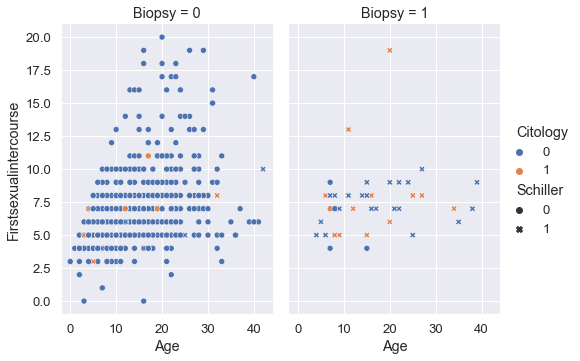

In [13]:
sns.set(font_scale=1.2)
sns.relplot(
    data=st,
    x="Age", y="Firstsexualintercourse", col="Biopsy",
    hue="Citology", style="Schiller", aspect= .7)#size=""

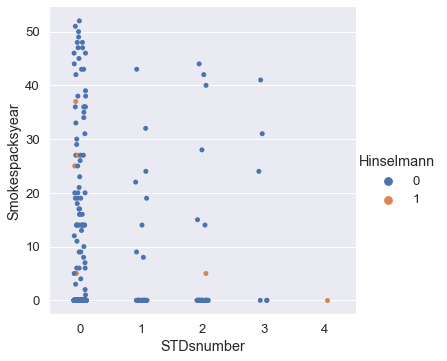

In [53]:
sns.set(font_scale=1.2)
sns.catplot(x="STDsnumber", y="Smokespacksyear", hue="Hinselmann", data=st)

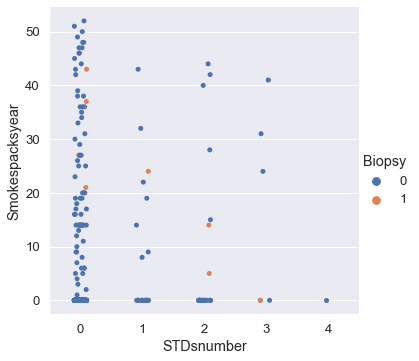

In [54]:
sns.set(font_scale=1.2)
sns.catplot(x="STDsnumber", y="Smokespacksyear",  hue="Biopsy", data=st)


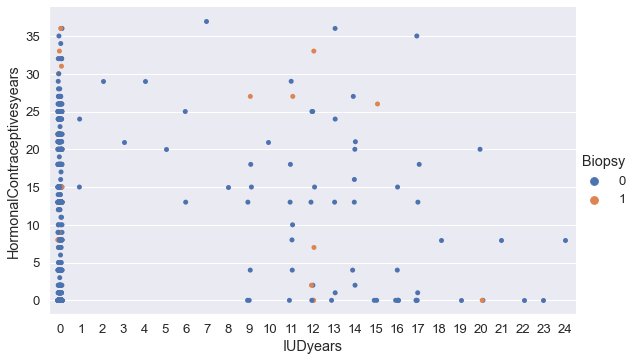

In [55]:
sns.set(font_scale=1.2)
sns.catplot(data=st, x="IUDyears", y="HormonalContraceptivesyears", hue="Biopsy", aspect=1.6)

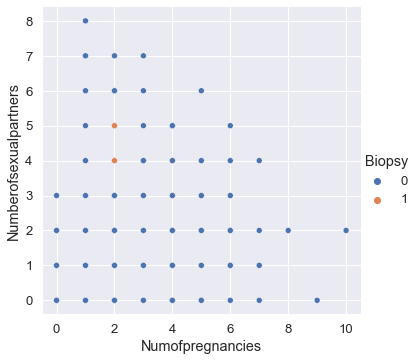

In [56]:
sns.set(font_scale=1.2)
sns.relplot(x="Numofpregnancies", y="Numberofsexualpartners", hue="Biopsy", data=st);

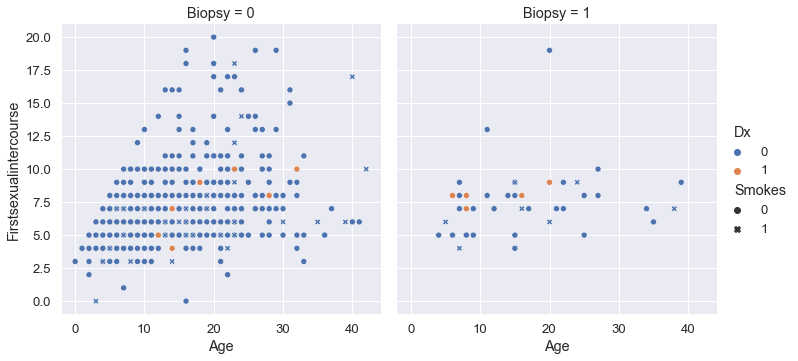

In [57]:
sns.set(font_scale=1.2)
sns.relplot(
    data=st,
    x="Age", y="Firstsexualintercourse", col="Biopsy",
    hue="Dx", style="Smokes")

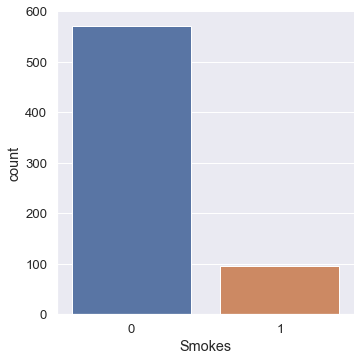

In [58]:
sns.set(font_scale=1.2)
sns.catplot(data=st, kind="count", x="Smokes")

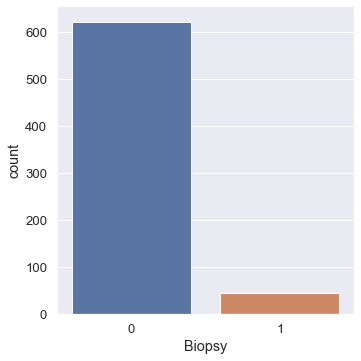

In [59]:
sns.set(font_scale=1.2)
sns.catplot(data=st, kind="count", x="Biopsy")

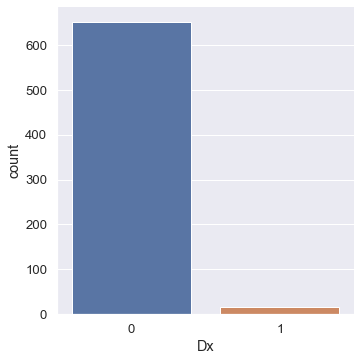

In [60]:
sns.set(font_scale=1.2)
sns.catplot(data=st, kind="count", x="Dx")

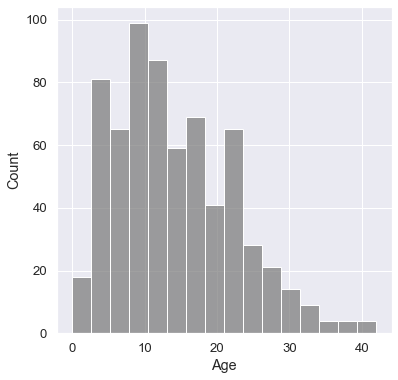

In [61]:
plt.figure(figsize=(6,6))
#plt.title("Age Distribution")
sns.set(font_scale=1.2)
ax = sns.histplot(st["Age"], color = 'Gray')